# import packages

In [2]:
import pandas as pd
import numpy as np
from Bio.Seq import Seq

# Read the file whose contain the index of splicing 

In [2]:
index_file=pd.read_table("grch38.txt")
index_file

,#NAME,CHROM,STRAND,TX_START,TX_END,EXON_START,EXON_END
0,OR4F5,1,+,69090,70008,"69090,","70008,"
1,OR4F16,1,-,685715,686654,"685715,","686654,"
2,SAMD11,1,+,925737,944575,"925737,925921,930154,931038,935771,939039,9392...","925800,926013,930336,931089,935896,939129,9394..."
3,NOC2L,1,-,944203,959290,"944203,945056,945517,946172,946401,948130,9484...","944800,945146,945653,946286,946545,948232,9486..."
4,KLHL17,1,+,960586,965715,"960586,961292,961628,961825,962354,962703,9631...","960800,961552,961750,962047,962471,962917,9632..."
...,...,...,...,...,...,...,...
19300,BPY2B,Y,+,24618003,24639207,"24618003,24618309,24621497,24626043,24628221,2...","24618034,24618432,24621634,24626162,24628339,2..."
19301,DAZ3,Y,-,24763068,24813479,"24763068,24768898,24773569,24774349,24784136,2...","24764925,24768997,24773604,24774421,24784208,2..."
19302,DAZ4,Y,+,24834126,24905240,"24834126,24840730,24841151,24841803,24842291,2...","24834129,24840877,24841243,24841855,24842355,2..."
19303,BPY2C,Y,-,25030900,25052104,"25030900,25031316,25037991,25038808,25041768,2...","25031222,25031441,25038116,25038914,25041886,2..."


# Read the chromosomes files whose contain the sequence of introns and exons

In [3]:
for n in range(1,23): 
    locals()["ch"+str(n)] = Seq("".join([l.strip() for l in open("Homo_sapiens.GRCh38.dna.chromosome.%i.fa"%n).readlines()[1:]]))
chx=Seq("".join([l.strip() for l in open("Homo_sapiens.GRCh38.dna.chromosome.X.fa").readlines()[1:]])) 
chy=Seq("".join([l.strip() for l in open("Homo_sapiens.GRCh38.dna.chromosome.Y.fa").readlines()[1:]]))

# make reverce complement for these chromosomes

In [4]:
for n in range(1,23): 
    locals()["ch"+str(n)+"_rev"]=locals()["ch"+str(n)].reverse_complement()
chx_rev=chx.reverse_complement()
chy_rev=chy.reverse_complement()

# make function to extract sequences and identify class

In [5]:
seq_splice=[]
class_type=[]
def splice(seq,indexs):
    for x,y in indexs:
         seq_splice.append(seq[x:y])
count=1             
for i in range(len(index_file)):
    #for n in range(1,23):
     #if index_file['CHROM'][i]=='%s'%i or index_file['CHROM'][i]=='X'or index_file['CHROM'][i]=='Y':
    if index_file['CHROM'][i]=='%s'%count:
        E=index_file['EXON_END'][i].split(",")
        E.remove(E[-1])
           
        s=index_file['EXON_START'][i].split(",")
        s.remove(s[-1])
            
        lis_EXON_START=[]
        lis_EXON_END=[]
            
        for j in E :
            lis_EXON_END.append(int(j)) 
        for k in s :
            lis_EXON_START.append(int(k))
        for m in lis_EXON_START :
            x=int((lis_EXON_START[0]+lis_EXON_END[0])/2)
            if class_type.count('Neither')<=177723:
                if index_file['STRAND'][i]=='+': 
                    splice(locals()["ch"+str(count)],[(x-200,x+201)])
                    class_type.append("Neither")
        #elif index_file['STRAND'][i]=='-':
                else :  
                    splice(locals()["ch"+str(count)+"_rev"],[(x-200,x+201)])
                    class_type.append("Neither")
            else:
                break
                   
        for r in range(len(lis_EXON_START)):
            if lis_EXON_START[r]==index_file['TX_START'][i] and lis_EXON_END[r]==index_file['TX_END'][i]:
                continue   
            else :
                if index_file['STRAND'][i]=='+':
                    splice(locals()["ch"+str(count)],[(lis_EXON_START[r]-200,lis_EXON_START[r]+201)])
                    class_type.append("Acceptor")
                    splice(locals()["ch"+str(count)],[(lis_EXON_END[r]-200,lis_EXON_END[r]+201)])
                    class_type.append("Doner")
                                  
                else:
                        #if index_file['STRAND'][i]=='-': 
                    splice(locals()["ch"+str(count)+"_rev"],[(lis_EXON_START[r]-200,lis_EXON_START[r]+201)])
                    class_type.append("Acceptor")
                    splice(locals()["ch"+str(count)+"_rev"],[(lis_EXON_END[r]-200,lis_EXON_END[r]+201)])
                    class_type.append("Doner")
                        
    elif index_file['CHROM'][i]=="X" or index_file['CHROM'][i]=="Y":
        E=index_file['EXON_END'][i].split(",")
        E.remove(E[-1])
        s=index_file['EXON_START'][i].split(",")   
        s.remove(s[-1])  
        lis_EXON_START=[]   
        lis_EXON_END=[]
        for j in E :
            lis_EXON_END.append(int(j))
        for k in s :    
             lis_EXON_START.append(int(k))
        for m in lis_EXON_START :
            x=int((lis_EXON_START[0]+lis_EXON_END[0])/2)
            if class_type.count('Neither')<=177723: 
                if index_file['STRAND'][i]=='+':
                    if index_file['CHROM'][i]=='X':
                        splice("chx",[(x-200,x+201)])
                    else:
                        splice("chy",[(x-200,x+201)])
                        class_type.append("Neither")
                else :
                    if index_file['CHROM'][i]=='X':
                        splice(locals()["chx_rev"],[(x-200,x+201)])
                    else :
                        splice(locals()["chy_rev"],[(x-200,x+201)])
                        class_type.append("Neither") 
            else:
                break
        for r in range(len(lis_EXON_START)):
            if lis_EXON_START[r]==index_file['TX_START'][i] and lis_EXON_END[r]==index_file['TX_END'][i]:
                continue   
            else :
                if index_file['STRAND'][i]=='+':
                    if index_file['CHROM'][i]=='X':
                        splice("chx",[(lis_EXON_START[r]-200,lis_EXON_START[r]+201)])
                        class_type.append("Acceptor")
                        splice("chx",[(lis_EXON_END[r]-200,lis_EXON_END[r]+201)])
                        class_type.append("Doner") 
                    else : 
                        splice("chy",[(lis_EXON_START[r]-200,lis_EXON_START[r]+201)])
                        class_type.append("Acceptor")
                        splice("chy",[(lis_EXON_END[r]-200,lis_EXON_END[r]+201)])
                        class_type.append("Doner")        
    else :
        count=count+1
        

# show the length of list of sequences and class

In [7]:
print("the list sequences length is :",len(seq_splice))
print("the list class length is :",len( class_type))

the list sequences length is : 563604
the list class length is : 563604


In [34]:
Acceptor=0
Doner=0
Neither=0
for i in class_type:
    if i=="Acceptor":
        Acceptor=Acceptor+1
    elif i=="Doner" :
        Doner=Doner+1
    else:
        Neither=Neither+1
        #print(class_type.index(i))
        
print("Acceptor = ",Acceptor)
print("Doner = ",Doner)
print("Neither = ",Neither)

Acceptor =  192940
Doner =  192940
Neither =  177724


# Convert sequences to binary matrix

In [9]:
for j in range(563604):
    locals()["x"+str(j)]=np.empty((0,5),dtype=np.float32)
    for i in seq_splice[j]:
        if i=='A':
            new_row=np.array([[1,0,0,0,0]],dtype=np.float32) 
        elif i=='T':
            new_row=np.array([[0,1,0,0,0]],dtype=np.float32)
        elif i=='C':
            new_row=np.array([[0,0,1,0,0]],dtype=np.float32)
        elif i=='G':
            new_row=np.array([[0,0,0,1,0]],dtype=np.float32)
        else :
            new_row=np.array([[0,0,0,0,1]],dtype=np.float32)
        
        locals()["x"+str(j)]=np.concatenate((locals()["x"+str(j)],new_row))     

# show one binary matrix from sequence

In [10]:
print(x0)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


# make matrix of zeros

In [11]:
z=np.zeros((563604,401,5),dtype=np.float32)
print(z)

[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


# collect matrixs of sequences in one matrix

In [ ]:
for i in range(563604):
    z[i,:,:]=locals()["x"+str(i)] 

# Convert class to binary matrix

In [38]:
class_type_matrix=np.empty((0,3),dtype=np.float32)
for i in range(len(class_type)):  
    if class_type[i]=='Acceptor':
        new_row=np.array([[1,0,0]],dtype=np.float32)
    elif class_type[i]=='Doner':
        new_row=np.array([[0,1,0]],dtype=np.float32)
    else :
        new_row=np.array([[0,0,1]],dtype=np.float32)
    class_type_matrix = np.concatenate((class_type_matrix,new_row))

# make shuffle to data

In [40]:
from sklearn.utils import shuffle
z,class_type_matrix = shuffle(z,class_type_matrix, random_state=0)

# store data in file

In [41]:
z.tofile('GProject1')
class_type_matrix.tofile('GProject2')

# Read data from file

In [3]:
data=np.fromfile('GProject1',dtype=np.float32)
label=np.fromfile('GProject2',dtype=np.float32)

# Split data to Train and Test

In [4]:
data_train=data.reshape(563604,401,5)[0:338162]
data_test=data.reshape(563604,401,5)[338162:563604]
lable_train=label.reshape(563604,3)[0:338162]
lable_test=label.reshape(563604,3)[338162:563604]

In [5]:
len(data_train)

338162

# Build CNN

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [7]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",input_shape=(401,5,1),activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(3,activation="relu"))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 401, 5, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 2, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 2, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 1, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 10)                3

# Trainning the model

In [51]:
model.fit(data_train,lable_train,shuffle=True,epochs=10)

Epoch 1/10
10568/10568 [==============================] - 196s 18ms/step - loss: 0.6834 - accuracy: 0.5209
Epoch 2/10
10568/10568 [==============================] - 197s 19ms/step - loss: 0.5527 - accuracy: 0.5640
Epoch 3/10
10568/10568 [==============================] - 195s 18ms/step - loss: 0.5730 - accuracy: 0.5378
Epoch 4/10
10568/10568 [==============================] - 200s 19ms/step - loss: 0.5408 - accuracy: 0.5681
Epoch 5/10
10568/10568 [==============================] - 203s 19ms/step - loss: 0.5209 - accuracy: 0.5826
Epoch 6/10
10568/10568 [==============================] - 204s 19ms/step - loss: 0.5340 - accuracy: 0.5661
Epoch 7/10
10568/10568 [==============================] - 205s 19ms/step - loss: 0.5216 - accuracy: 0.5754
Epoch 8/10
10568/10568 [==============================] - 190s 18ms/step - loss: 0.5126 - accuracy: 0.5875
Epoch 9/10
10568/10568 [==============================] - 204s 19ms/step - loss: 0.5084 - accuracy: 0.5850
Epoch 10/10
10568/10568 [============

# save model weights

In [79]:
model.save_weights('CNN')

# load model

In [10]:
model.load_weights('CNN')

# Testing the model

In [69]:
model.evaluate(data_test,lable_test)

7046/7046 [==============================] - 28s 4ms/step - loss: 0.5253 - accuracy: 0.5205


[0.5252529978752136, 0.5205374360084534]

In [70]:
predictions=model.predict(data_test[0:1000])
print(predictions.shape)

(1000, 3)


In [71]:
np.round(predictions)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]], dtype=float32)

# Visualizing

In [12]:
history = model.fit(data_train,lable_train,epochs = 10 , validation_data = (data_test, lable_test))

Epoch 1/10
10568/10568 [==============================] - 210s 20ms/step - loss: 0.5291 - accuracy: 0.5512 - val_loss: 0.5845 - val_accuracy: 0.4469
Epoch 2/10
10568/10568 [==============================] - 213s 20ms/step - loss: 0.5079 - accuracy: 0.5902 - val_loss: 0.4940 - val_accuracy: 0.6056
Epoch 3/10
10568/10568 [==============================] - 216s 20ms/step - loss: 0.6083 - accuracy: 0.4216 - val_loss: 0.5677 - val_accuracy: 0.5337
Epoch 4/10
10568/10568 [==============================] - 213s 20ms/step - loss: 0.6209 - accuracy: 0.3853 - val_loss: 0.6289 - val_accuracy: 0.3977
Epoch 5/10
10568/10568 [==============================] - 211s 20ms/step - loss: 0.5851 - accuracy: 0.4783 - val_loss: 0.6052 - val_accuracy: 0.4321
Epoch 6/10
10568/10568 [==============================] - 216s 20ms/step - loss: 0.6081 - accuracy: 0.4334 - val_loss: 0.5790 - val_accuracy: 0.5289
Epoch 7/10
10568/10568 [==============================] - 220s 21ms/step - loss: 0.9135 - accuracy: 0.5101

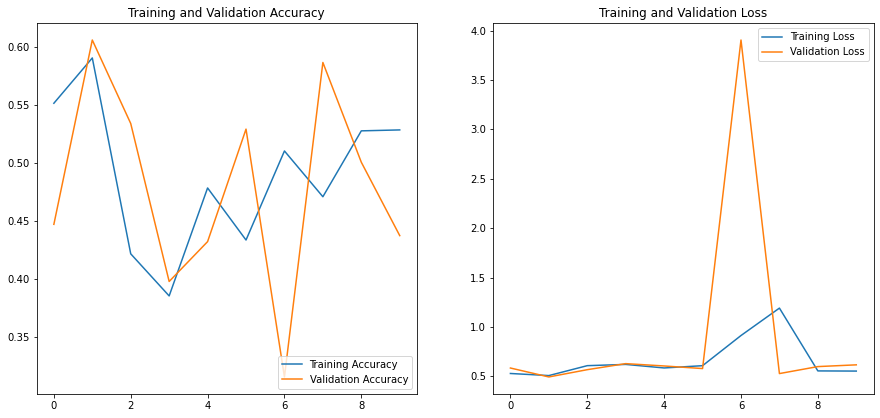

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()